In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# models
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv("./data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns = ["math_score"], axis = 1)
y = df["math_score"]

In [5]:
numerical_features = [i for i in X.columns if df[i].dtype != "object"]
categorical_features = [i for i in X.columns if df[i].dtype == "object"]
print("Numerical Features : ", numerical_features)
print("Categorical Features : ", categorical_features)

sc=StandardScaler()
ohe = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe, categorical_features),
        ("StandardScaler", sc, numerical_features)
    ]
)

Numerical Features :  ['reading_score', 'writing_score']
Categorical Features :  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [6]:
X = preprocessor.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [8]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_val = r2_score(true, predicted)
    return (mae, mse, rmse, r2_val)

In [9]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False)
}

model_list=[]
r2_list=[]

for model in models.values():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_mae, y_train_mse, y_train_rmse, y_train_r2 = evaluate_model(y_train, y_train_pred)
    y_test_mae, y_test_mse, y_test_rmse, y_test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"Model: {model.__class__.__name__}")
    model_list.append(model.__class__.__name__)

    print("Model Performance on Training Set")
    print("-- Mean Absolute Error: ", y_train_mae)
    print("-- Mean Squared Error: ", y_train_mse)
    print("-- Root Mean Squared Error: ", y_train_rmse)
    print("-- R2 Score: ", y_train_r2)
    print("--------------------------------------------")
    print("Model Performance on Test Set")
    print("-- Mean Absolute Error: ", y_test_mae)
    print("-- Mean Squared Error: ", y_test_rmse)
    print("-- Root Mean Squared Error: ", y_test_rmse)
    print("-- R2 Score: ", y_test_r2)

    r2_list.append(y_test_r2)
    print("====================================================\n\n")

Model: LinearRegression
Model Performance on Training Set
-- Mean Absolute Error:  4.266711846071957
-- Mean Squared Error:  28.33487038064859
-- Root Mean Squared Error:  5.323050852720514
-- R2 Score:  0.8743172040139593
--------------------------------------------
Model Performance on Test Set
-- Mean Absolute Error:  4.21476314247485
-- Mean Squared Error:  5.393993869732843
-- Root Mean Squared Error:  5.393993869732843
-- R2 Score:  0.8804332983749565


Model: Lasso
Model Performance on Training Set
-- Mean Absolute Error:  5.206302661246526
-- Mean Squared Error:  43.47840400585579
-- Root Mean Squared Error:  6.593815587795566
-- R2 Score:  0.8071462015863456
--------------------------------------------
Model Performance on Test Set
-- Mean Absolute Error:  5.157881810347763
-- Mean Squared Error:  6.519694535667419
-- Root Mean Squared Error:  6.519694535667419
-- R2 Score:  0.8253197323627853


Model: Ridge
Model Performance on Training Set
-- Mean Absolute Error:  4.26498782

In [10]:
results  = pd.DataFrame(list(zip(model_list, r2_list)), columns = ["Model", "R2_Score"])
results = results.sort_values(by="R2_Score", ascending=False)
results

,Model,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
5,RandomForestRegressor,0.854513
8,CatBoostRegressor,0.851632
6,AdaBoostRegressor,0.848369
7,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,DecisionTreeRegressor,0.739149


In [11]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
score = r2_score(y_test, y_pred)
print("Ridge Model R2 Score : ", score)

Ridge Model R2 Score :  0.8805931485028737


Text(0, 0.5, 'Predicted')

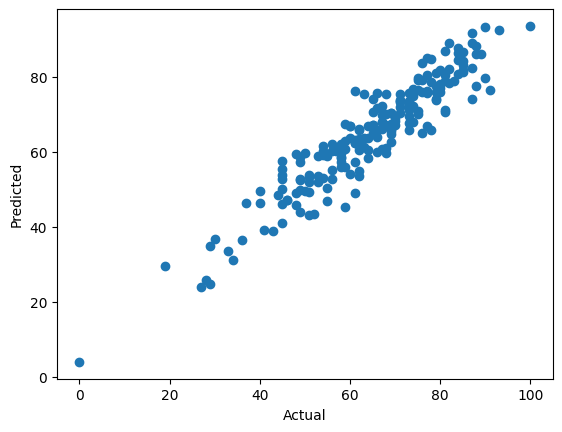

In [12]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

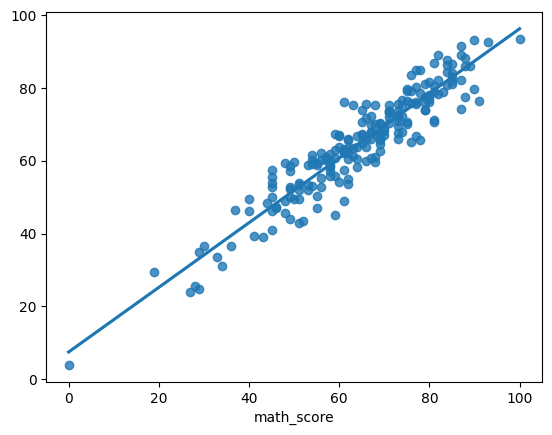

In [13]:
sns.regplot(x=y_test,y=y_pred,ci=None)

In [14]:
pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})

,Actual,Predicted,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
